In [1]:
# les imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import SVR
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
#chargement des données depuis le fichier bruyance.xls
data1 = pd.read_excel('bruyance1.xls', sheet_name='Feuil1')
data2 = pd.read_excel('bruyance1.xls', sheet_name='Feuil3')

In [3]:
#visualisation du contenu des données
data1

,Référence,Dégradé,Vn,ZCR,SF,CGS,SNR,CS,classe
0,1aFm2s03.c01,1aFm2s03.c19,2.282211,2.256614,0.136236,3072.361366,-0.834154,0.032883,environnement
1,1aFf2s03.c01,1aFf2s03.c19,2.319427,2.151638,0.135872,3097.379005,0.497280,0.034097,environnement
2,1aFm1s01.c01,1aFm1s01.c19,2.309963,2.543205,0.134415,3101.208458,0.573188,0.036270,environnement
3,1aFm2s01.c01,1aFm2s01.c19,2.289375,2.285581,0.135148,3086.027621,-0.237073,0.034339,environnement
4,1aFf2s01.c01,1aFf2s01.c19,2.258854,2.180051,0.136685,3071.768504,1.646239,0.033287,environnement
...,...,...,...,...,...,...,...,...,...
417,1aFm2s02.c01,1aFm2s02.c36,2.790068,4.114658,0.119544,3351.327730,3.545238,0.060640,souffle
418,1aFf2s02.c01,1aFf2s02.c36,2.957075,4.180330,0.117586,3357.552276,3.626432,0.057617,souffle
419,1aFm1s03.c01,1aFm1s03.c37,3.174204,5.477918,0.127320,3563.127722,10.530540,0.065303,souffle
420,1aFm2s03.c01,1aFm2s03.c37,2.941321,3.321399,0.115251,3271.336229,9.729235,0.046679,souffle


In [4]:
#visualisation du contenu des données
data2

,N°,Conditions,RSB,Loc/s.,Référence,Dégradé,Moy. DMOS
0,4,NaN,NaN,m1,1aFm1s02.c01,1aFm1s02.c04,1.000
1,4,Brown_noise,0 dB,m2,1aFm2s02.c01,1aFm2s02.c04,1.000
2,4,NaN,NaN,f1,1aFf1s02.c01,1aFf1s02.c04,1.000
3,4,NaN,NaN,f2,1aFf2s02.c01,1aFf2s02.c04,1.000
4,4,NaN,NaN,m1,1aFm1s03.c01,1aFm1s03.c04,1.000
...,...,...,...,...,...,...,...
535,48,NaN,NaN,f2,1aFf2s02.c01,1aFf2s02.c48,3.875
536,48,NaN,NaN,m1,1aFm1s01.c01,1aFm1s01.c48,4.000
537,48,Pub_Noise,40 dB,m2,1aFm2s01.c01,1aFm2s01.c48,3.875
538,48,NaN,NaN,f1,1aFf1s01.c01,1aFf1s01.c48,4.000


#compréhension des données chargées

Dans la data1 nous avons 9 colonnes et 422 lignes. Les 9 colonnes sont respectivement: Reference: Dégradé : Vn : ZCR : SF : CGS : SNR : CS : Classe :

Dans la data2 nous avons 7 colonnes et 540 lignes. Les 7 lignes sont respectivement: N° : Conditions : RSB : Loc/s : Reference : Dégradé : Moy.DMOS :

pourquoi allons nous nous passer des colonnes N° ,Conditions ,RSB ,Loc/s pour la suite Explication de la nécessité de fusionner les deux data pour la suite

In [5]:
# Vérifier l'unicité des éléments dans chaque colonne de data1
for colonne in data1.columns:
    nb_elements_uniques = data1[colonne].nunique()
    nb_elements_total = len(data1[colonne])
    if nb_elements_uniques == nb_elements_total:
        print(f"Tous les éléments de la colonne {colonne} sont uniques.")
    else:
        print(f"Il y a des éléments non uniques dans la colonne {colonne}.")

Il y a des éléments non uniques dans la colonne Référence.
Tous les éléments de la colonne Dégradé sont uniques.
Tous les éléments de la colonne    Vn sont uniques.
Tous les éléments de la colonne    ZCR sont uniques.
Il y a des éléments non uniques dans la colonne    SF.
Tous les éléments de la colonne  CGS sont uniques.
Tous les éléments de la colonne   SNR sont uniques.
Tous les éléments de la colonne  CS sont uniques.
Il y a des éléments non uniques dans la colonne classe.


In [6]:
# Vérifier l'unicité des éléments dans chaque colonne de data2
for colonne in data2.columns:
    nb_elements_uniques = data2[colonne].nunique()
    nb_elements_total = len(data2[colonne])
    if nb_elements_uniques == nb_elements_total:
        print(f"Tous les éléments de la colonne {colonne} sont uniques.")
    else:
        print(f"Il y a des éléments non uniques dans la colonne {colonne}.")

Il y a des éléments non uniques dans la colonne N°.
Il y a des éléments non uniques dans la colonne Conditions.
Il y a des éléments non uniques dans la colonne RSB.
Il y a des éléments non uniques dans la colonne Loc/s..
Il y a des éléments non uniques dans la colonne Référence.
Tous les éléments de la colonne Dégradé sont uniques.
Il y a des éléments non uniques dans la colonne Moy. DMOS.


On remarque que la colonne comune aux deux data et unique (expliquer en quoi l'unicité est impératif pour la fusion) est dégradé la fusion se fera alors selon cette colonne

In [7]:
feuille_combinee = pd.merge(data1, data2[['Dégradé', 'Moy. DMOS']], on='Dégradé', how='left')
feuille_combinee

,Référence,Dégradé,Vn,ZCR,SF,CGS,SNR,CS,classe,Moy. DMOS
0,1aFm2s03.c01,1aFm2s03.c19,2.282211,2.256614,0.136236,3072.361366,-0.834154,0.032883,environnement,1.000
1,1aFf2s03.c01,1aFf2s03.c19,2.319427,2.151638,0.135872,3097.379005,0.497280,0.034097,environnement,1.250
2,1aFm1s01.c01,1aFm1s01.c19,2.309963,2.543205,0.134415,3101.208458,0.573188,0.036270,environnement,1.375
3,1aFm2s01.c01,1aFm2s01.c19,2.289375,2.285581,0.135148,3086.027621,-0.237073,0.034339,environnement,1.000
4,1aFf2s01.c01,1aFf2s01.c19,2.258854,2.180051,0.136685,3071.768504,1.646239,0.033287,environnement,1.125
...,...,...,...,...,...,...,...,...,...,...
417,1aFm2s02.c01,1aFm2s02.c36,2.790068,4.114658,0.119544,3351.327730,3.545238,0.060640,souffle,2.375
418,1aFf2s02.c01,1aFf2s02.c36,2.957075,4.180330,0.117586,3357.552276,3.626432,0.057617,souffle,2.500
419,1aFm1s03.c01,1aFm1s03.c37,3.174204,5.477918,0.127320,3563.127722,10.530540,0.065303,souffle,3.875
420,1aFm2s03.c01,1aFm2s03.c37,2.941321,3.321399,0.115251,3271.336229,9.729235,0.046679,souffle,3.500


In [8]:
#Exploration des données
# Afficher les dimensions du DataFrame
print("Dimensions du DataFrame : ", feuille_combinee.shape)

# Afficher les types de données de chaque colonne
print("Types de données :")
print(feuille_combinee.dtypes)

Dimensions du DataFrame :  (422, 10)
Types de données :
Référence     object
Dégradé       object
   Vn        float64
   ZCR       float64
   SF        float64
 CGS         float64
  SNR        float64
 CS          float64
classe        object
Moy. DMOS    float64
dtype: object


le nombre de ligne reste identique et la colonne Moy.DMOS est bien et bel ajouté. Nous pouvons à présent continuer le prétraitement de nos données. Expliquer pourquoi il est impératif de donner des valeurs numériques à la place de environnement,grésillement et souffle

In [9]:
feuille_combinee['classe'].replace({'environnement': 0, 'grésillement': 1, 'souffle': 2}, inplace=True)
feuille_combinee

,Référence,Dégradé,Vn,ZCR,SF,CGS,SNR,CS,classe,Moy. DMOS
0,1aFm2s03.c01,1aFm2s03.c19,2.282211,2.256614,0.136236,3072.361366,-0.834154,0.032883,0,1.000
1,1aFf2s03.c01,1aFf2s03.c19,2.319427,2.151638,0.135872,3097.379005,0.497280,0.034097,0,1.250
2,1aFm1s01.c01,1aFm1s01.c19,2.309963,2.543205,0.134415,3101.208458,0.573188,0.036270,0,1.375
3,1aFm2s01.c01,1aFm2s01.c19,2.289375,2.285581,0.135148,3086.027621,-0.237073,0.034339,0,1.000
4,1aFf2s01.c01,1aFf2s01.c19,2.258854,2.180051,0.136685,3071.768504,1.646239,0.033287,0,1.125
...,...,...,...,...,...,...,...,...,...,...
417,1aFm2s02.c01,1aFm2s02.c36,2.790068,4.114658,0.119544,3351.327730,3.545238,0.060640,2,2.375
418,1aFf2s02.c01,1aFf2s02.c36,2.957075,4.180330,0.117586,3357.552276,3.626432,0.057617,2,2.500
419,1aFm1s03.c01,1aFm1s03.c37,3.174204,5.477918,0.127320,3563.127722,10.530540,0.065303,2,3.875
420,1aFm2s03.c01,1aFm2s03.c37,2.941321,3.321399,0.115251,3271.336229,9.729235,0.046679,2,3.500


In [10]:
# Vérifier les valeurs nulles dans feuille_combinee
valeurs_nulles = feuille_combinee.isnull().sum()

# Afficher les colonnes avec des valeurs nulles
print("Colonnes avec des valeurs nulles :\n", valeurs_nulles[valeurs_nulles > 0])

Colonnes avec des valeurs nulles :
 Series([], dtype: int64)


In [11]:
# Résumé statistique des données numériques
print("Résumé statistique des données numériques :")
print(feuille_combinee.describe())

# Résumé statistique des données catégoriques
print("Résumé statistique des données catégoriques :")
print(feuille_combinee.describe(include=['object']))

Résumé statistique des données numériques :
               Vn         ZCR          SF          CGS         SNR  \
count  422.000000  422.000000  422.000000   422.000000  422.000000   
mean     4.631882    3.107149    0.148656  3699.002156    7.420611   
std      2.400474    0.947506    0.022675   524.622707    4.189954   
min      1.057306    0.748141    0.094749  3071.768504   -0.834154   
25%      2.689486    2.422454    0.134436  3307.326753    4.186347   
50%      4.101147    3.110393    0.149533  3521.026453    8.175220   
75%      6.354707    3.789151    0.161761  3955.642771   10.832362   
max     12.095238    5.822515    0.209371  5190.927466   14.846082   

               CS      classe   Moy. DMOS  
count  422.000000  422.000000  422.000000  
mean     0.077933    0.779621    2.203495  
std      0.044363    0.917635    0.910535  
min      0.001712    0.000000    1.000000  
25%      0.045663    0.000000    1.375000  
50%      0.066031    0.000000    2.125000  
75%      0.101429

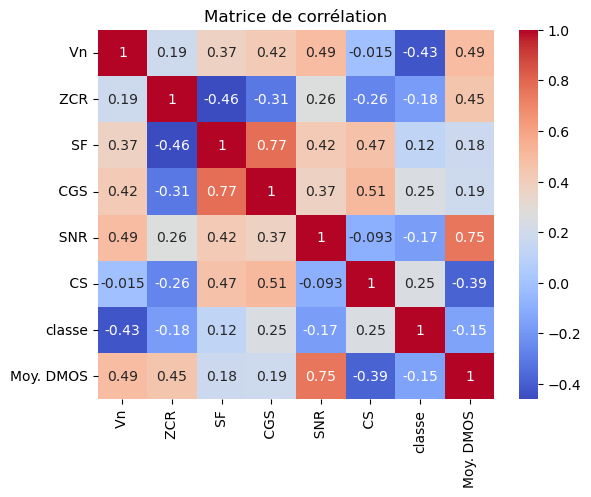

In [12]:
correlation_matrix = feuille_combinee.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [13]:
# Séparer les caractéristiques (features) et les étiquettes (labels)
X = feuille_combinee.drop(columns=['Référence','Dégradé','classe', 'Moy. DMOS']) 
y = feuille_combinee['classe']
Y = feuille_combinee['Moy. DMOS']

In [17]:
# Affichons le décompte des exemples pour chaque classe
classe_counts = feuille_combinee['classe'].value_counts()
print(classe_counts)

0    234
2    141
1     47
Name: classe, dtype: int64


In [18]:
#division en données test et données d'entrainement pour la classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
#division en données test et données d'entrainement pour la regression
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X, Y, test_size=0.2, random_state=42)

# Classification 

## Arbre de décision

In [20]:
model = DecisionTreeClassifier()

# Entraînons le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faisons des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluons la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Affichons le rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9176470588235294

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.80      0.80      0.80        10
           2       0.87      0.93      0.90        28

    accuracy                           0.92        85
   macro avg       0.88      0.89      0.88        85
weighted avg       0.92      0.92      0.92        85



In [21]:
# Effectuons la validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 pour une validation croisée à 5 plis

# Affichons les scores de validation croisée
print("\nCross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", cv_scores.mean())


Cross Validation Scores: [0.88235294 0.91176471 0.92537313 0.79104478 0.86567164]
Mean Cross Validation Score: 0.8752414398595258


In [22]:
# Définir les paramètres à rechercher
param_grid = {
    'max_depth': [5, 6, 7, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
    "criterion":["gini","entropy"]
}

# Initialiser un objet GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)

# Effectuer la recherche d'hyperparamètres et la validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Afficher la meilleure performance
print("Meilleure performance (accuracy) :", grid_search.best_score_)

Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleure performance (accuracy) : 0.8753731343283582


In [23]:
model = DecisionTreeClassifier(criterion= "gini", max_depth= 7, min_samples_leaf= 2, min_samples_split= 5)

# Entraînons le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faisons des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluons la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Affichons le rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Effectuons la validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 pour une validation croisée à 5 plis

# Affichons les scores de validation croisée
print("\nCross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", cv_scores.mean())

Accuracy: 0.9411764705882353

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.89      0.80      0.84        10
           2       0.93      0.93      0.93        28

    accuracy                           0.94        85
   macro avg       0.93      0.90      0.91        85
weighted avg       0.94      0.94      0.94        85


Cross Validation Scores: [0.88235294 0.88235294 0.88059701 0.82089552 0.89552239]
Mean Cross Validation Score: 0.8723441615452151


## Random Forest

In [24]:
# Créons un modèle de Random Forest
random_forest = RandomForestClassifier()

# Entraînons le modèle sur les données d'entraînement
classifier_model = random_forest.fit(X_train, y_train)

# Fesons des prédictions sur l'ensemble de test
y_pred = random_forest.predict(X_test)

# Calculons la précision (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Affichons le rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9411764705882353

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       1.00      0.80      0.89        10
           2       0.93      0.93      0.93        28

    accuracy                           0.94        85
   macro avg       0.96      0.90      0.93        85
weighted avg       0.94      0.94      0.94        85



In [25]:
# Créer un modèle de Random Forest
random_forest = RandomForestClassifier()

# Effectuer la validation croisée
scores = cross_val_score(random_forest, X, y, cv=5)

# Afficher les scores de validation croisée
print("Cross-Validation Scores:", scores)

# Afficher la moyenne des scores de validation croisée
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.85882353 0.90588235 0.92857143 0.88095238 0.96428571]
Mean Accuracy: 0.907703081232493


In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Créer un objet GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Entraîner GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres trouvés par GridSearchCV
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)
print("Meilleure performance (accuracy) :", grid_search.best_score_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Meilleure performance (accuracy) : 0.9405618964003513


In [27]:
# Créons un modèle de Random Forest
random_forest = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
# Effectuer la validation croisée
scores = cross_val_score(random_forest, X, y, cv=5)

# Afficher les scores de validation croisée
print("Cross-Validation Scores:", scores)

# Afficher la moyenne des scores de validation croisée
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.84705882 0.89411765 0.9047619  0.89285714 0.94047619]
Mean Accuracy: 0.8958543417366946


In [28]:
# Créons un modèle de Random Forest
random_forest = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
# Entraînons le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

# Fesons des prédictions sur l'ensemble de test
y_pred = random_forest.predict(X_test)

# Calculons la précision (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Affichons le rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9764705882352941

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       1.00      1.00      1.00        10
           2       0.96      0.96      0.96        28

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



## SVM 

### noyau rbf 

In [29]:
# Créer un modèle SVM
svm_model = SVC()

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test)

# Calculer la précision (accuracy) du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy with SVM:", accuracy_svm)

# Afficher le rapport de classification
print("\nClassification Report with SVM:")
print(classification_report(y_test, y_pred_svm))

Accuracy with SVM: 0.6470588235294118

Classification Report with SVM:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        47
           1       0.00      0.00      0.00        10
           2       1.00      0.29      0.44        28

    accuracy                           0.65        85
   macro avg       0.54      0.43      0.40        85
weighted avg       0.67      0.65      0.57        85



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)  # cv=5 pour une validation croisée à 5 plis

# Afficher les scores de validation croisée
print("Cross Validation Scores with SVM:", cv_scores_svm)
print("Mean Cross Validation Score with SVM:", cv_scores_svm.mean())

Cross Validation Scores with SVM: [0.72058824 0.63235294 0.67164179 0.65671642 0.65671642]
Mean Cross Validation Score with SVM: 0.667603160667252


### noyau linear 

In [31]:
# Créer un modèle SVM avec noyau linéaire
svm_model_linear = SVC(kernel='linear')

# Entraîner le modèle sur les données d'entraînement
svm_model_linear.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_svm_linear = svm_model_linear.predict(X_test)

# Calculer la précision (accuracy) du modèle
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
print("Accuracy with SVM (linear kernel):", accuracy_svm_linear)

# Afficher le rapport de classification
print("\nClassification Report with SVM (linear kernel):")
print(classification_report(y_test, y_pred_svm_linear))


Accuracy with SVM (linear kernel): 0.8352941176470589

Classification Report with SVM (linear kernel):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       1.00      0.90      0.95        10
           2       0.75      0.75      0.75        28

    accuracy                           0.84        85
   macro avg       0.87      0.84      0.85        85
weighted avg       0.84      0.84      0.84        85



In [32]:
cv_scores_svm = cross_val_score(svm_model_linear, X_train, y_train, cv=5)  # cv=5 pour une validation croisée à 5 plis

# Afficher les scores de validation croisée
print("Cross Validation Scores with SVM:", cv_scores_svm)
print("Mean Cross Validation Score with SVM:", cv_scores_svm.mean())

Cross Validation Scores with SVM: [0.75       0.73529412 0.88059701 0.76119403 0.7761194 ]
Mean Cross Validation Score with SVM: 0.7806409130816505


### noyau polynomial 

In [33]:
# Créer un modèle SVM avec noyau polynomial
svm_model_poly = SVC(kernel='poly', degree=3)  # Spécifiez le degré selon votre choix

# Entraîner le modèle sur les données d'entraînement
svm_model_poly.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_svm_poly = svm_model_poly.predict(X_test)

# Calculer la précision (accuracy) du modèle
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
print("Accuracy with SVM (polynomial kernel):", accuracy_svm_poly)

# Afficher le rapport de classification
print("\nClassification Report with SVM (polynomial kernel):")
print(classification_report(y_test, y_pred_svm_poly))

Accuracy with SVM (polynomial kernel): 0.6

Classification Report with SVM (polynomial kernel):
              precision    recall  f1-score   support

           0       0.59      0.91      0.72        47
           1       0.00      0.00      0.00        10
           2       0.67      0.29      0.40        28

    accuracy                           0.60        85
   macro avg       0.42      0.40      0.37        85
weighted avg       0.55      0.60      0.53        85



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
cv_scores_svm = cross_val_score(svm_model_poly, X_train, y_train, cv=5)  # cv=5 pour une validation croisée à 5 plis

# Afficher les scores de validation croisée
print("Cross Validation Scores with SVM:", cv_scores_svm)
print("Mean Cross Validation Score with SVM:", cv_scores_svm.mean())

Cross Validation Scores with SVM: [0.72058824 0.57352941 0.68656716 0.65671642 0.65671642]
Mean Cross Validation Score with SVM: 0.6588235294117647


# Regression

## Arbre de décision

In [35]:
# Créer un modèle d'arbre de décision pour la régression
tree_regressor = DecisionTreeRegressor()

# Entraîner le modèle sur les données d'entraînement
tree_regressor.fit(X_train_reg, Y_train_reg)

# Faire des prédictions sur l'ensemble de test
y_pred_tree = tree_regressor.predict(X_test_reg)

# Évaluer les performances du modèle
mse_tree = mean_squared_error(Y_test_reg, y_pred_tree)
print("Mean Squared Error (Decision Tree):", mse_tree)


Mean Squared Error (Decision Tree): 0.3125


In [36]:
cv_scores_tree = cross_val_score(tree_regressor, X_train_reg, Y_train_reg, cv=5, scoring='neg_mean_squared_error')

# La fonction 'cross_val_score' renvoie la négation de l'erreur quadratique moyenne
# car par convention, les scores sont maximisés, alors que nous voulons minimiser l'erreur quadratique moyenne.
# Par conséquent, nous prenons l'opposé des scores.
cv_scores_tree = -cv_scores_tree

# Afficher les scores de validation croisée
print("Cross Validation Scores (Decision Tree):", cv_scores_tree)
print("Mean Cross Validation Score (Decision Tree):", cv_scores_tree.mean())

Cross Validation Scores (Decision Tree): [0.29273897 0.24678309 0.33885261 0.16184701 0.25606343]
Mean Cross Validation Score (Decision Tree): 0.2592570237050044


## Random forest

In [37]:
# Créer un modèle de forêt aléatoire pour la régression
forest_regressor = RandomForestRegressor()

# Entraîner le modèle sur les données d'entraînement
regressor_model = forest_regressor.fit(X_train_reg, Y_train_reg)

# Faire des prédictions sur l'ensemble de test
y_pred_forest = forest_regressor.predict(X_test_reg)

# Évaluer les performances du modèle
mse_forest = mean_squared_error(Y_test_reg, y_pred_forest)
print("Mean Squared Error (Random Forest):", mse_forest)

Mean Squared Error (Random Forest): 0.12362523897058823


In [38]:
forest_regressor = RandomForestRegressor()

# Effectuer la validation croisée
scores = cross_val_score(forest_regressor, X_train_reg, Y_train_reg, cv=5, scoring='neg_mean_squared_error')

# Les scores renvoyés sont négatifs, nous prenons l'opposé pour obtenir le MSE positif
mse_scores = -scores

# Calculer la moyenne des scores de MSE
mean_mse = mse_scores.mean()
print("Mean Squared Error (Random Forest) avec cross-validation :", mean_mse)

Mean Squared Error (Random Forest) avec cross-validation : 0.12679671305695786


## SVR rbf

In [39]:
# Créer un modèle SVM pour la régression
svm_regressor = SVR(kernel='rbf')  # Vous pouvez spécifier d'autres paramètres SVM selon votre besoin

# Effectuer la validation croisée
scores = cross_val_score(svm_regressor, X, Y, cv=5, scoring='neg_mean_squared_error')

# Convertir les scores en valeurs positives
mse_scores = -scores

# Afficher les scores de validation croisée
print("Cross-Validation MSE Scores with SVM:", mse_scores)

# Afficher la moyenne des scores de validation croisée
print("Mean MSE with SVM:", np.mean(mse_scores))


Cross-Validation MSE Scores with SVM: [0.73308102 0.84207762 0.89058293 0.88187864 0.68895117]
Mean MSE with SVM: 0.8073142747517856


## svm linear 

In [40]:
# Créer un modèle SVM pour la régression avec un noyau linéaire
svm_regressor_linear = SVR(kernel='linear')

# Effectuer la validation croisée
scores_linear = cross_val_score(svm_regressor_linear, X, Y, cv=5, scoring='neg_mean_squared_error')

# Convertir les scores en valeurs positives
mse_scores_linear = -scores_linear

# Afficher les scores de validation croisée
print("Cross-Validation MSE Scores with SVM (linear kernel):", mse_scores_linear)

# Afficher la moyenne des scores de validation croisée
print("Mean MSE with SVM (linear kernel):", np.mean(mse_scores_linear))


Cross-Validation MSE Scores with SVM (linear kernel): [2.27184749 2.04356682 2.91174911 1.12699466 1.51457784]
Mean MSE with SVM (linear kernel): 1.9737471835742526


## SVM polynomial 

In [41]:
# Créer un modèle SVM pour la régression avec un noyau polynomial
svm_regressor_poly = SVR(kernel='poly', degree=3)  # Vous pouvez spécifier le degré selon votre choix

# Effectuer la validation croisée
scores_poly = cross_val_score(svm_regressor_poly, X, Y, cv=5, scoring='neg_mean_squared_error')

# Convertir les scores en valeurs positives
mse_scores_poly = -scores_poly

# Afficher les scores de validation croisée
print("Cross-Validation MSE Scores with SVM (polynomial kernel):", mse_scores_poly)

# Afficher la moyenne des scores de validation croisée
print("Mean MSE with SVM (polynomial kernel):", np.mean(mse_scores_poly))


Cross-Validation MSE Scores with SVM (polynomial kernel): [0.79050966 0.87700905 1.03162186 0.96796085 0.76657929]
Mean MSE with SVM (polynomial kernel): 0.8867361418450258


In [42]:
# Effectuer la validation croisée
scores = cross_val_score(svm_regressor_poly, X, Y, cv=5, scoring='neg_mean_squared_error')

# Convertir les scores en valeurs positives
mse_scores = -scores

# Afficher les scores de validation croisée
print("Cross-Validation MSE Scores:", mse_scores)

# Afficher la moyenne des scores de validation croisée
print("Mean MSE:", mse_scores.mean())

Cross-Validation MSE Scores: [0.79050966 0.87700905 1.03162186 0.96796085 0.76657929]
Mean MSE: 0.8867361418450258


In [43]:
#pip install --upgrade scikit-learn joblib

^C
Note: you may need to restart the kernel to use updated packages.


In [44]:
#pip install --upgrade scikit-learn joblib --user

^C
Note: you may need to restart the kernel to use updated packages.


In [45]:
#pip show scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


In [46]:
#pip show joblib

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: d:\anaconda\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex
^C
Note: you may need to restart the kernel to use updated packages.


In [47]:
dump(classifier_model, 'classification.joblib')

['classification.joblib']

In [48]:
dump(regressor_model, 'regression.joblib')

['regression.joblib']